### Practical no.: 5

Name: Madhav Jha <br>
Roll no.: 48 <br>
Batch: E3 <br>
Branch: CSE(AIML) <br>
Semester: VI

## AIM: Write a program to implement back propagation algorithm on iris dataset
- Input layer: 4 neurons
- hidden layer: 2 neurons
- output layer: 3 neurons

each layer will have a bias unit as well

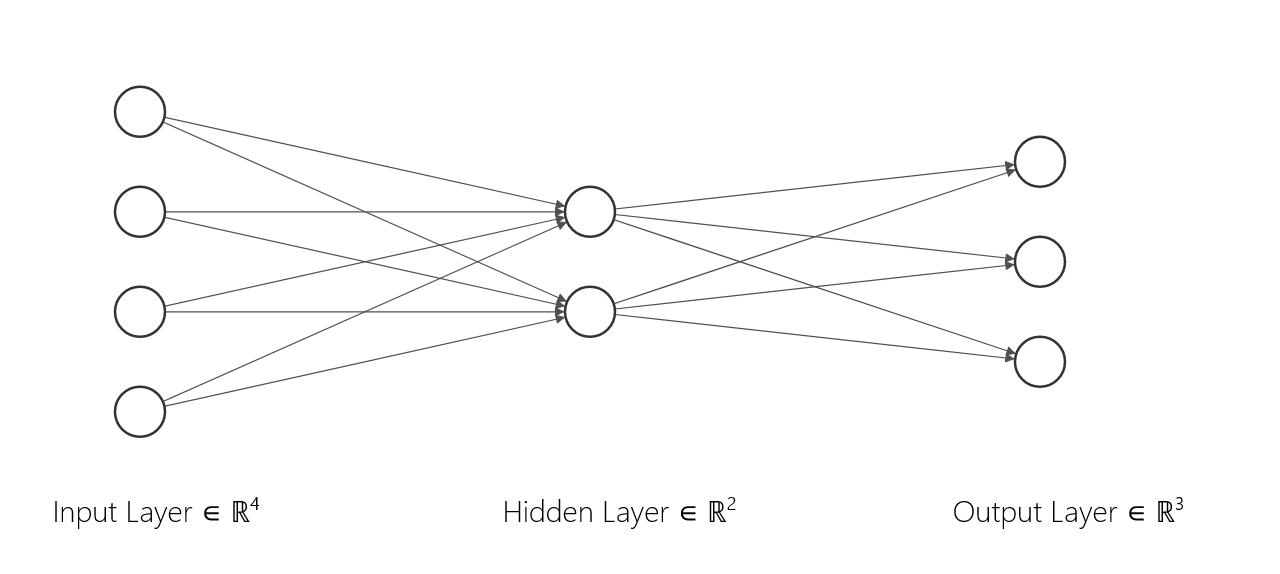

In [1]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

x = iris["data"]
y = iris.target

In [3]:
temp = []
for i in y:
  if i == 0:
    res = [1,0,0]
  elif i == 1:
    res = [0, 1, 0]
  else:
    res = [0, 0, 1]
  temp.append(res)
y = temp

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
import random
import math

In [6]:
def activation(x):
  res = 1/(1 + math.exp(-x));
  return round(res, 4)

def calcLoss(y, yDash):
  res = [0, 0, 0]
  for i in range(len(y)):
    res[0] += (y[i][0] - yDash[i][0])**2
    res[1] += (y[i][1] - yDash[i][1])**2
    res[2] += (y[i][2] - yDash[i][2])**2
  res = [round(i/2, 4) for i in res]
  return res

In [7]:
w = [ round(random.random(), 4) for x in range(20) ]

In [8]:
def forward(weight = [], inp = []):
  netRes = []
  res = []
  netH = []
  hRes = []
  # input layer 4 + 1 with bias
  for i in inp:
    h1, h2 = 0, 0
    k = 0
    for j in i:
      h1 += w[k]*j
      k += 1

    # bias with 1
    h1 += w[k]
    k+= 1

    for j in i:
      h2 += w[k]*j
      k += 1
    
    # bias with 1
    h2 += w[k]
    k+= 1

    netH.append([h1, h2])
    h1 = activation(h1)
    h2 = activation(h2)

    o1, o2, o3 = 0, 0, 0
    o1 = h1*w[k] + h2*w[k+1] + w[k+2]
    k += 3

    o2 = h1*w[k] + h2*w[k+1] + w[k+2]
    k += 3

    o3 = h1*w[k] + h2*w[k+1] + w[k+2]

    netRes.append([o1, o2, o3])
    o1 = activation(o1)
    o2 = activation(o2)
    o3 = activation(o3)

    hRes.append([h1, h2])
    res.append([o1, o2, o3])
  return (netH, hRes, netRes, res)

In [9]:
ita = 0.1
def backpropagation(x, tar, out, netOut, h, netH, w):
  # first output layer to hidden layer so weights for 11 - 19

  # 11 12 13 -> o1
  for iw in range(11,14):
    # for each input calc d(total)/d(weight)
    dw = 0
    j = 0
    for i in range(len(x)):
    # d(total)/d(o(1)) = -(tar - out)
      a = - ( tar[i][0] - out[i][0] )
      a *= out[i][0]*(1 - out[i][0])
      a *= h[i][j] if (j < len(h[i])) else 1
      j += 1
      dw += a
    w[iw] = w[iw] - ita*dw

  # 14 15 16 -> o2
  for iw in range(14,17):
    # for each input calc d(total)/d(weight)
    dw = 0
    j = 0
    for i in range(len(x)):
    # d(total)/d(o(1)) = -(tar - out)
      a = - ( tar[i][1] - out[i][1] )
      a *= out[i][1]*(1 - out[i][1])
      a *= h[i][j] if (j < len(h[i])) else 1
      j += 1
      dw += a
    w[iw] = w[iw] - ita*dw

  # 17 18 19 -> o3
  for iw in range(17,20):
    # for each input calc d(total)/d(weight)
    dw = 0
    j = 0
    for i in range(len(x)):
    # d(total)/d(o(1)) = -(tar - out)
      a = - ( tar[i][2] - out[i][2] )
      a *= out[i][2]*(1 - out[i][2])
      a *= h[i][j] if (j < len(h[i])) else 1
      j += 1
      dw += a
    w[iw] = w[iw] - ita*dw

  # send hidden layer to input layer so weights for 0 - 10
  # for each weight it is d(total)/d(w) = d(total)/d(h1) * d(h)/d(netH) * d(netH)/d(w)
  # so only last term changes for all w, thus let's calc prev 2

  # d(total)/d(h1) = d(eo1)/d(o1)*d(o1)/d(neto1)*d(neto1)/d(o1)
  dth1 = 0
  for i in range(len(x)):
    # for o1
    temp = - ( tar[i][0] - out[i][0] )
    temp *= out[i][0]*(1 - out[i][0])
    temp *= w[11] 
    dth1 += temp


    # for o2
    temp = - ( tar[i][1] - out[i][1] )
    temp *= out[i][1]*(1 - out[i][1])
    temp *= w[14]
    dth1 += temp

    # for o3
    temp = - ( tar[i][2] - out[i][2] )
    temp *= out[i][2]*(1 - out[i][2])
    temp *= w[17]
    dth1 += temp

  # d(h1)/d(netH1)
  dhn1 = 0
  for i in range(len(x)):
    dhn1 += h[i][0]*(1 - h[i][0])
  
  # weights 0-5 that are affected by h1
  for i in range(0,6):
    dw = 0
    for j in range(len(x)):
      temp = x[j][i] if (i < len(x[j])) else 0;
      dw += dth1*dhn1*temp
    w[i] = w[i] - ita*dw

  # for weights 6 - 9
  dth2 = 0
  for i in range(len(x)):
    # for o1
    temp = - ( tar[i][0] - out[i][0] )
    temp *= out[i][0]*(1 - out[i][0])
    temp *= w[12] 
    dth1 += temp


    # for o2
    temp = - ( tar[i][1] - out[i][1] )
    temp *= out[i][1]*(1 - out[i][1])
    temp *= w[15]
    dth1 += temp

    # for o3
    temp = - ( tar[i][2] - out[i][2] )
    temp *= out[i][2]*(1 - out[i][2])
    temp *= w[18]
    dth1 += temp

  # d(h1)/d(netH1)
  dhn1 = 0
  for i in range(len(x)):
    dhn1 += h[i][1]*(1 - h[i][1])
  
  # weights 6-10 that are affected by h1
  for i in range(6,11):
    dw = 0
    for j in range(len(x)):
      temp = x[j][i] if (i < len(x[j])) else 0;
      dw += dth1*dhn1*temp
    w[i] = w[i] - ita*dw

  return w

In [10]:
epoch = 1000
tw = w
for i in range(epoch):
  yDash = forward(tw, X_train)
  tw = backpropagation(X_train, y_train, yDash[3], yDash[2], yDash[1], yDash[0], tw)
  # print(tw)
print("epoch",i,": ", calcLoss(y_train, yDash[3]))

epoch 999 :  [10.9162, 11.981, 11.9834]


In [11]:
yDash = forward(tw, X_test)
calcLoss(y_test, yDash[3])

[5.8475, 4.713, 4.7143]